In [55]:
import numpy as np
import numpy.linalg as npla
import matplotlib.pyplot as plt
import scipy.linalg as la
from matplotlib import animation
from IPython.display import HTML

In [2]:
# %matplotlib inline

# Problem 1

Consider the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = .05 u_{xx}, \quad x \in [0,1], \quad t \in [0,1]\\
	&{ } u(0,t) = 0,\quad u(1,t) = 0,\\
	&{ } u(x,0) = 2\max\{.2 - |x-.5|,0\}.
	\end{split}
\end{align}

Approximate the solution $u(x,t)$ at time $t = .4$ by taking 6 subintervals in the $x$ dimension and 10 subintervals in time.

In [31]:
def heat_solver(nu, T, J, M, c, f, xmin, xmax):
    """Solves heat equation BVP: u_t = k*u_xx
    args: 
        nu (float)
        T (float): max time t > 0
        J (int): number of x subintervals (where x goes from xmin to xmax)
        M (int): number of t subintervals (where t goes from 0 to T)
        c (float): u(xmin,t) = u(xmax, t) = c
        f (func): u(x,0) = f
        
    """
    # Initialize variables
    x = np.linspace(xmin, xmax, J+1)
    t = np.linspace(0, T, M+1)
    h = (xmax-xmin)/J # delta_X
    k = T/M # delta_T
    # compute u0 and u1
    u = []
    u0 = np.zeros(len(x))
    u0 = f(x)
    # set boundary conditions
    u0[0] = c
    u0[-1] = c
    u.append(u0)

    # compute the rest of the u values
    for step in range(1, M+1): # time step
        u0 = u[-1].copy()
        u_next = u0.copy()
        # compute next iteration using 1.1
        u_next[1:J] = u0[1:J] + nu*k/(h**2)*(u0[2:] - 2*u0[1:J] + u0[:J-1])

        # print(np.linalg.norm(u0[1:J] - (u0[1:J] + nu*k/(h**2)*(u0[2:] - 2*u0[1:J] + u0[:J-1]))))
        # print(u_next[1:J]-u0[1:J])

        u.append(u_next)
        

    return x, u

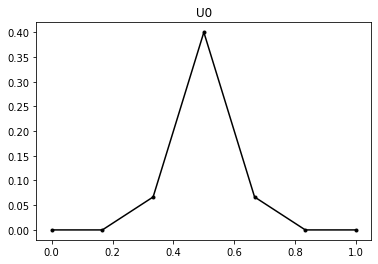

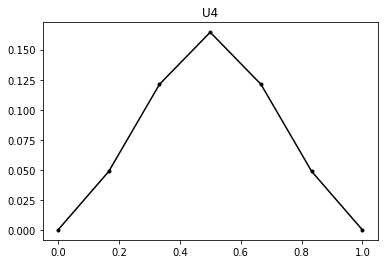

In [32]:
f = np.vectorize(lambda x: 2*np.max([0.2-np.abs(x-0.5), 0]))

x, u = heat_solver(nu=0.05, T=1, J=6, M=10, c=0, f=f, xmin=0, xmax=1)

u = np.array(u)
plt.plot(x, u[0, :], 'k.-')
plt.title("U0")
plt.show()

plt.plot(x, u[4, :], 'k.-')
plt.title("U4")
plt.show()

# Problem 2

Solve the initial/boundary value problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1], \\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}
	\end{split}
\end{align}

using the first order explicit method (1.1).
Use 140 subintervals in the $x$ dimension and 70 subintervals in time.
The initial and final states are shown in Figures 1 and 2.
Animate your results.

Explicit methods usually have a stability condition, called a CFL condition (for Courant-Friedrichs-Lewy).
For method (1.1) the CFL condition that must be satisfied is that:

$$\lambda \leq \frac{1}{2}$$

Repeat your computations using 140 subintervals in the $x$ dimension and 66 subintervals in time. Animate the results.
For these values the CFL condition is broken; you should easily see the result of this instability in the approximation $U^{66}$.


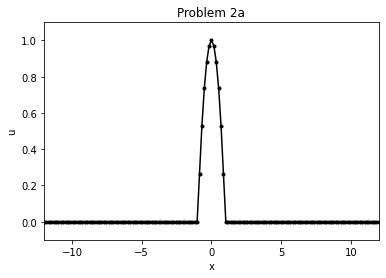

In [58]:

f = np.vectorize(lambda x: np.max([1-x**2, 0]))
J = 140
M = 70
x, u = heat_solver(nu=1.0, T=1, J=J, M=M, c=0, f=f, xmin=-12, xmax=12)
u = np.array(u)

u_max = np.max(u)
u_min = np.min(u)
x_max = np.max(x)
x_min = np.min(x)

fig = plt.figure()
ax = fig.add_subplot(111)

point, = plt.plot([],[], "k.-")


def update(i):
    point.set_data(x, u[i])
    return point

ax.set_xlim((x_min, x_max))
ax.set_ylim((u_min-0.1,u_max+0.1))
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title("Problem 2a")

ani = animation.FuncAnimation(fig, update,frames=range(M+1), interval=25)
HTML(ani.to_html5_video())

# save animation
ani.save('prob2a_ani.mp4')

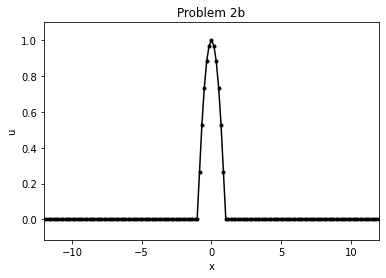

In [59]:
f = np.vectorize(lambda x: np.max([1-x**2, 0]))
J = 140
M = 66
x, u = heat_solver(nu=1.0, T=1, J=J, M=M, c=0, f=f, xmin=-12, xmax=12)
u = np.array(u)

u_max = np.max(u)
u_min = np.min(u)
x_max = np.max(x)
x_min = np.min(x)

fig = plt.figure()
ax = fig.add_subplot(111)

point, = plt.plot([],[], "k.-")


def update(i):
    point.set_data(x, u[i])
    return point

ax.set_xlim((x_min, x_max))
ax.set_ylim((u_min-0.1,u_max+0.1))
ax.set_xlabel("x")
ax.set_ylabel("u")
ax.set_title("Problem 2b")

ani = animation.FuncAnimation(fig, update,frames=range(M+1), interval=25)
HTML(ani.to_html5_video())

# save animation
ani.save('prob2b_ani.mp4')

In [60]:
# load animation
from base64 import b64encode
mp4 = open('prob2a_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


In [61]:
# load animation
from base64 import b64encode
mp4 = open('prob2b_ani.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

# Problem 3

Using the Crank Nicolson method, numerically approximate the solution $u(x,t)$ of the problem

\begin{align}
	\begin{split}
	&{ } u_t = u_{xx}, \quad x \in [-12,12],\quad t \in [0,1],\\
	&{ } u(-12,t) = 0,\quad u(12,t) = 0,\\
	&{ } u(x,0) = \max\{1 - x^2,0\}.
	\end{split}
\end{align}

Demonstrate that the numerical approximation at $t = 1$ converges to  $u(x,t=1)$.
Do this by computing $U$ at $t=1$ using $20,40,80,160,320$, and $640$ steps.
Use the same number of steps in both time and space.
Reproduce the loglog plot shown in Figure 4.
The slope of the line there shows the proper rate of convergence.

To measure the error, use the solution with the smallest $h$ (largest number of intervals) as if it were the exact solution, then sample each solution only at the x-values that are represented in the solution with the largest $h$ (smallest number of intervals).
Use the $\infty$-norm on the arrays of values at those points to measure the error.

Notice that, since the Crank-Nicolson method is unconditionally stable, there is no CFL condition and we can use the same number of intervals in time and space.

In [62]:
def heat_cn(nu, T, J, M, c, f, xmin, xmax):
    """Solves heat equation BVP: u_t = k*u_xx
    args: 
        nu (float)
        T (float): max time t > 0
        J (int): number of x subintervals (where x goes from xmin to xmax)
        M (int): number of t subintervals (where t goes from 0 to T)
        c (float): u(xmin,t) = u(xmax, t) = c
        f (func): u(x,0) = f
        
    """
    # Initialize variables
    x = np.linspace(xmin, xmax, J+1)
    t = np.linspace(0, T, M+1)
    h = (xmax-xmin)/J # delta_X
    k = T/M # delta_T
    lamb = nu*k/(2*h**2)

    # compute u0
    u = []
    u0 = np.zeros(len(x))
    u0 = f(x)
    # set boundary conditions
    u0[0] = c
    u0[-1] = c
    u.append(u0)

    # compute the rest of the u values
    for step in range(1, M+1): # time step
        # compute A
        A = np.zeros((J+1, J+1))
        np.fill_diagonal(A[1:, :], lamb) #lower subdiag
        np.fill_diagonal(A[:, 1:], lamb) # upper supdiag
        np.fill_diagonal(A, 1-2*lamb) # diagonal
        A[0,0] = 1
        A[-1, -1] = 1
        A[0, 1] = 0
        A[-1, -2] = 0

        # compute B
        B = np.zeros((J+1, J+1))
        np.fill_diagonal(B[1:, :], -1*lamb) #lower subdiag
        np.fill_diagonal(B[:, 1:], -1*lamb) # upper supdiag
        np.fill_diagonal(B, 1+2*lamb) # diagonal
        B[0,0] = 1
        B[-1, -1] = 1
        B[0, 1] = 0
        B[-1, -2] = 0

        u0 = u[-1].copy()
        u_next = np.linalg.solve(B, A@u0)

        u.append(u_next)
        

    return x, u

In [67]:
f = np.vectorize(lambda x: np.max([1-x**2, 0]))
# approximate with different steps
u_list = []
vals = [20, 40, 80, 160, 320, 640][::-1]
# print(vals)
for i in range(len(vals)):
    J = vals[i]
    M = vals[i]

    x, u = heat_cn(nu=1.0, T=1, J=J, M=M, c=0, f=f, xmin=-12, xmax=12)
    u = np.array(u)
    u_list.append(u)

h_list = [(24)/i for i in vals[1:]]
# print(h_list)
exact = u_list[0]
# print(len(u_list))
errors = [np.linalg.norm((exact[-1, ::2**i] - u_list[i][-1, :]), ord=np.inf) for i in range(1, len(u_list))]
# print(errors)
plt.loglog(h_list, errors, 'k.-', label='Error')
plt.loglog(h_list, np.square(h_list), label='h**2')
plt.legend(loc='best')
plt.xlabel('h')
plt.show()